<a href="https://colab.research.google.com/github/dreamboysatvik/CASIA2.0-ELA_FEATURE_FORGERY_CLASSIFICATION/blob/main/experimental_transfer_learning_do_not_use_it.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"satvik6601","key":"df0920e216bc40e99f9bbfba35379226"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 !kaggle datasets download -d divg07/casia-20-image-tampering-detection-dataset

100% 2.55G/2.56G [00:40<00:00, 65.9MB/s]
100% 2.56G/2.56G [00:40<00:00, 67.7MB/s]


In [ ]:
 !unzip casia-20-image-tampering-detection-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_arc00045_arc00046_10084.tif  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_arc00045_arc00071_10087.tif  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_arc00046_arc00045_10083.tif  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_arc00054_cha00085_11922.jpg  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_arc00071_arc00045_10085.tif  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_arc00073_arc00072_10267.tif  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_arc00088_arc00064_10394.tif  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_art00012_art00013_11812.jpg  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_art00014_art00013_11836.jpg  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_art00058_art00049_10529.tif  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_art00067_ani00093_11801.jpg  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_art00067_ani00095_11803.jpg  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_art00067_ani00096_11802.jpg  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_art00067_nat00013_11804.jpg  
  inflating: CASIA2/Tp/Tp

In [ ]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [ ]:
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

In [ ]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

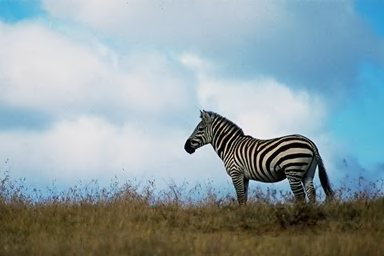

In [ ]:
real_image_path = '/content/CASIA2/Au/Au_ani_00001.jpg'
Image.open(real_image_path)

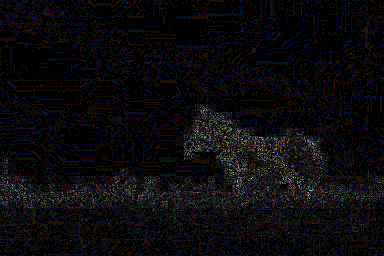

In [ ]:
convert_to_ela_image(real_image_path, 90)

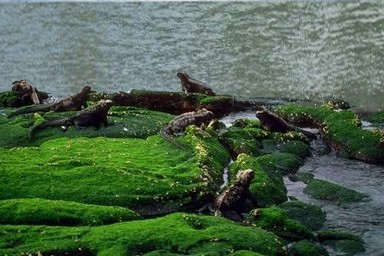

In [ ]:
fake_image_path = '/content/CASIA2/Tp/Tp_D_CND_M_N_ani00018_sec00096_00138.tif'
Image.open(fake_image_path)

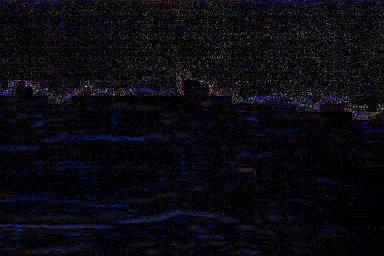

In [ ]:
convert_to_ela_image(fake_image_path, 90)

In [ ]:
image_size = (128, 128)

In [ ]:
def prepare_image(image_path):
  return np.array(convert_to_ela_image(image_path,90).resize(image_size)).flatten() / 255.0

In [ ]:
  X = []
  Y = []
  

In [ ]:
import random
path = '/content/CASIA2/Au/'
for dirname, _, filenames in os.walk(path):
  for filename in filenames:
    if filename.endswith('jpg') or filename.endswith('png'):
      full_path = os.path.join(dirname,filename)
      X.append(prepare_image(full_path))
      Y.append(1)
      if len(Y)%500 == 0:
        print(f'Processing {len(Y)} images')
random.shuffle(X)
X = X[:3650]
Y = Y[:3650]


Processing 500 images
Processing 1000 images
Processing 1500 images
Processing 2000 images


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag)


Processing 2500 images
Processing 3000 images
Processing 3500 images
Processing 4000 images
Processing 4500 images
Processing 5000 images
Processing 5500 images
Processing 6000 images
Processing 6500 images
Processing 7000 images


In [ ]:
print(len(X), len(Y))

3650 3650


In [ ]:


path = '/content/CASIA2/Tp/'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(0)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')
X = X[:7500]
Y = Y[:7500]
print(len(X), len(Y))

Processing 4000 images
Processing 4500 images
Processing 5000 images
Processing 5500 images
Processing 6000 images
Processing 6500 images
Processing 7000 images
Processing 7500 images
Processing 8000 images
Processing 8500 images
7500 7500


In [ ]:
X = np.array(X)
Y = to_categorical(Y, 2)
X = X.reshape(-1, 128, 128, 3)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.25, random_state=5)
X_test, X_val, Y_test, Y_val = train_test_split(X_test,Y_test ,test_size = 0.75,random_state=5 )

X = X.reshape(-1,1,1,1)

print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))
print(len(X_test), len(Y_test))

5625 5625
1407 1407
468 468


In [ ]:
from keras.applications.resnet import ResNet50, ResNet101, ResNet152
model = Sequential()
model.add(ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet'))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
epochs = 30
batch_size = 32
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2

In [ ]:
hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val))

Epoch 1/30
176/176 [==============================] - 88s 166ms/step - loss: 0.4656 - accuracy: 0.7982 - val_loss: 1.2116 - val_accuracy: 0.4577
Epoch 2/30
176/176 [==============================] - 24s 135ms/step - loss: 0.2126 - accuracy: 0.9267 - val_loss: 0.7211 - val_accuracy: 0.4577
Epoch 3/30
176/176 [==============================] - 24s 138ms/step - loss: 0.1536 - accuracy: 0.9395 - val_loss: 1.5552 - val_accuracy: 0.4577
Epoch 4/30
176/176 [==============================] - 24s 136ms/step - loss: 0.1201 - accuracy: 0.9521 - val_loss: 1.2882 - val_accuracy: 0.4577
Epoch 5/30
176/176 [==============================] - 24s 135ms/step - loss: 0.1122 - accuracy: 0.9611 - val_loss: 0.9778 - val_accuracy: 0.4293
Epoch 6/30
176/176 [==============================] - 24s 136ms/step - loss: 0.0952 - accuracy: 0.9630 - val_loss: 0.6682 - val_accuracy: 0.5444
Epoch 7/30
176/176 [==============================] - 24s 136ms/step - loss: 0.0599 - accuracy: 0.9776 - val_loss: 0.7046 - val_ac

In [ ]:
class_names = ['fake', 'real']
yhat = model.predict(X_test)
yhat = (yhat > 0.5) 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, yhat)
print('Accuracy: %.3f' % (accuracy * 100))

Accuracy: 88.675


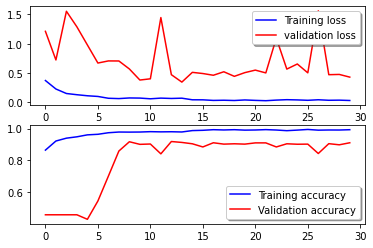

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np
# Generate a model with all layers (with top)
vgg16 = VGG16(weights=None, include_top=True, input_shape=(128,128,3))

#Add a layer where input is the output of the  second last layer 
x = Dense(2, activation='softmax', name='predictions')(vgg16.layers[-2].output)

#Then create the corresponding model 
my_model = Model(inputs=vgg16.input, outputs=x)
my_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [ ]:
my_model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
hist1 = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val))

Epoch 1/30
176/176 [==============================] - 25s 140ms/step - loss: 0.0202 - accuracy: 0.9945 - val_loss: 0.5561 - val_accuracy: 0.8941
Epoch 2/30
176/176 [==============================] - 24s 137ms/step - loss: 0.0185 - accuracy: 0.9957 - val_loss: 0.5369 - val_accuracy: 0.9019
Epoch 3/30
176/176 [==============================] - 24s 135ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.7480 - val_accuracy: 0.9055
Epoch 4/30
176/176 [==============================] - 24s 136ms/step - loss: 0.0255 - accuracy: 0.9952 - val_loss: 0.5033 - val_accuracy: 0.9097
Epoch 5/30
176/176 [==============================] - 24s 136ms/step - loss: 0.0178 - accuracy: 0.9959 - val_loss: 0.5854 - val_accuracy: 0.9062
Epoch 6/30
176/176 [==============================] - 24s 136ms/step - loss: 0.0168 - accuracy: 0.9950 - val_loss: 0.5702 - val_accuracy: 0.8806
Epoch 7/30
176/176 [==============================] - 24s 136ms/step - loss: 0.0112 - accuracy: 0.9963 - val_loss: 0.6033 - val_ac

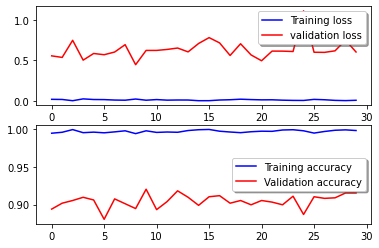

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist1.history['loss'], color='b', label="Training loss")
ax[0].plot(hist1.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist1.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

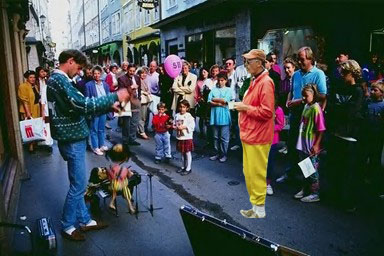

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
img_size = (180, 180)
last_conv_layer_name = "dense_1"

# The local path to our target image
img_path = '/content/CASIA2/Tp/Tp_D_CRN_M_N_cha00035_cha00040_11732.jpg'

Image.open(img_path)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
# Prepare image


image = prepare_image(img_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
# Print what the top predicted class is
preds = model.predict(image)
result = np.argmax(preds[0])

print("Predicted:", result)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(image, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

Predicted: 0


InvalidArgumentError: ignored

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    Image.open(cam_path)
    


save_and_display_gradcam(img_path, heatmap)

In [ ]:
Image.open('cam.jpg')

In [ ]:
base_model = tf.keras.applications.vgg16.VGG16(
    include_top=False, weights='imagenet',
    input_shape=(180,180,3) 
)
base_model.summary()
base_model.trainable = False


In [ ]:

# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('/content/CASIA2/Tp/Tp_D_CRN_M_N_cha00035_cha00040_11732.jpg'
, target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()